In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from util import run_model
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.helpers.gnn_model_explainer import  GNNModelExplainer
from GNNFakeNews.utils.enums import GNNModelTypeEnum, GNNFeatureTypeEnum

# 1.2. SAGE GNN

## DATASET = POLITIFACT, FEATURE = BERT

In [3]:
model_type = GNNModelTypeEnum.SAGE_GNN

In [4]:
model, dataset_manager = run_model(model_type)

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.SAGE_GNN
dataset = GNNDatasetTypeEnum.POLITIFACT
batch_size = 128
lr = 0.01
weight_decay = 0.01
n_hidden = 128
epochs = 35
feature = GNNFeatureTypeEnum.BERT
concat = True
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7f30e7ea1cd0>
#################################
Loading dataset 'politifact' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Test set results: acc: 0.8371, f1_macro: 0.8362, f1_micro: 0.8371,precision: 0.8224, recall: 0.8664, auc: 0.8856, ap: 0.8897


train_last_layer_val size: (62, 128)
train_y size: (62,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


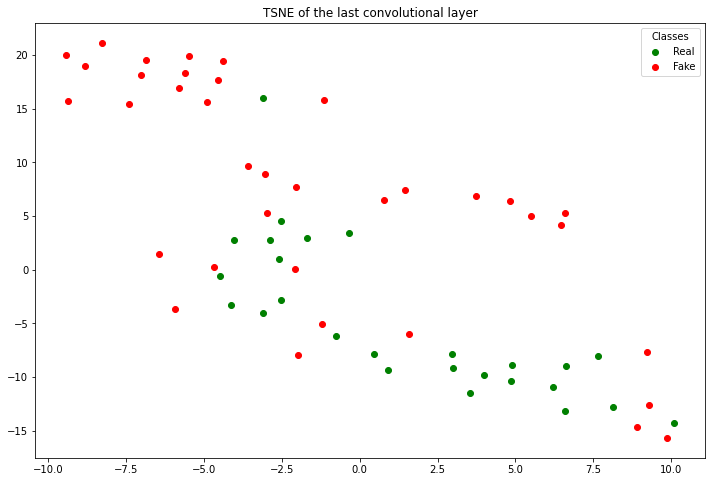

In [5]:
model.m_visualize_tsne_of_last_conv_layer('all')

all_last_layer_val size: (314, 128)
all_y size: (314,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


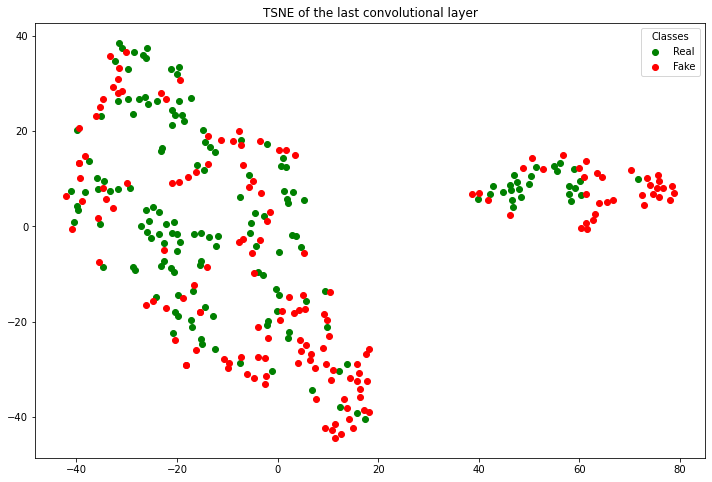

In [6]:
model.m_visualize_tsne_of_last_conv_layer(split='all')

In [7]:
sample_data = dataset_manager.get_random_train_samples(device=model.m_args.device)[0]
explainer = GNNModelExplainer(model, sample_data)

Choosing indexes: [3]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 511.82it/s]


y: Fake
Removing edges with score less than 0.13389790058135986 with min 0.11400462687015533 and max 0.15967562794685364
Dropping 406 edges out of 811


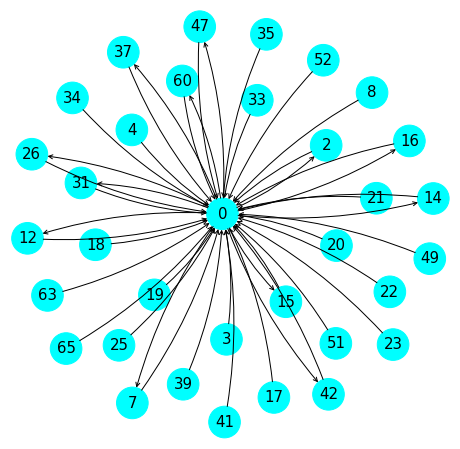

In [10]:
explainer.visualize_explaining_graph()

Choosing indexes: [57 22 22 58 54 53  3 26 18 58]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 294.12it/s]


y: Fake
Removing edges with score less than 0.13562050461769104 with min 0.11433924734592438 and max 0.15620234608650208
Dropping 467 edges out of 934


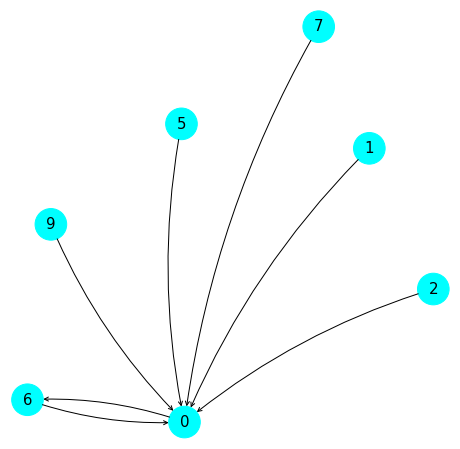

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 290.61it/s]


y: Fake
Removing edges with score less than 0.07372451573610306 with min 0.05556371062994003 and max 0.948016881942749
Dropping 5 edges out of 10


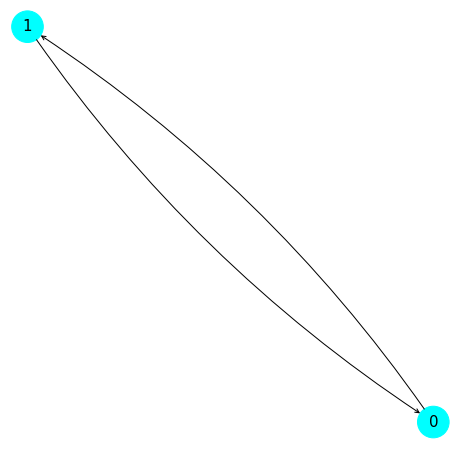

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 293.13it/s]


y: Fake
Removing edges with score less than 0.07356761395931244 with min 0.06167847290635109 and max 0.9438648223876953
Dropping 5 edges out of 10


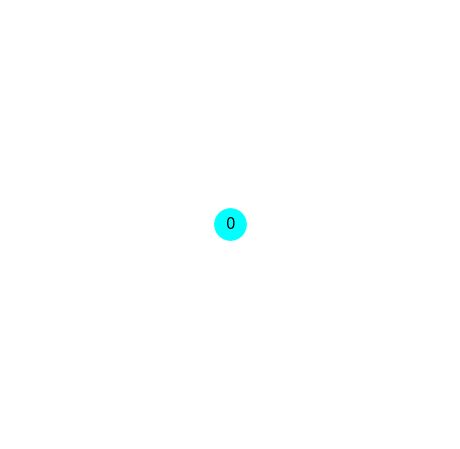

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 286.02it/s]


y: Fake
Removing edges with score less than 0.09081095457077026 with min 0.06578835099935532 and max 0.9468908309936523
Dropping 40 edges out of 79


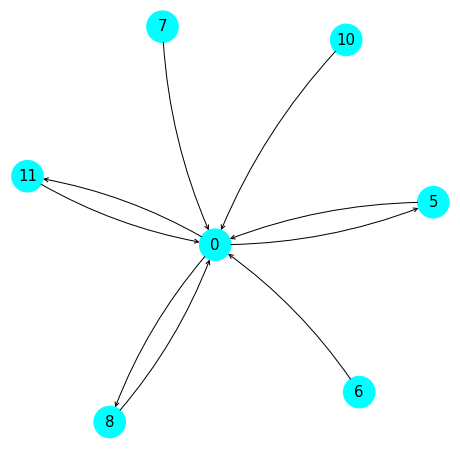

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 316.04it/s]


y: Fake
Removing edges with score less than 0.08562944084405899 with min 0.0683123767375946 and max 0.9437673091888428
Dropping 28 edges out of 55


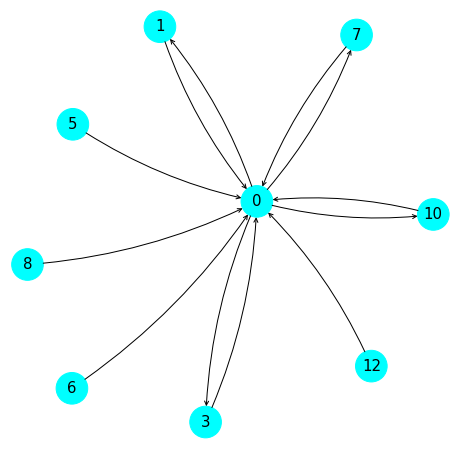

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 290.74it/s]


y: Fake
Removing edges with score less than 0.09195215255022049 with min 0.06557575613260269 and max 0.9499016404151917
Dropping 43 edges out of 85


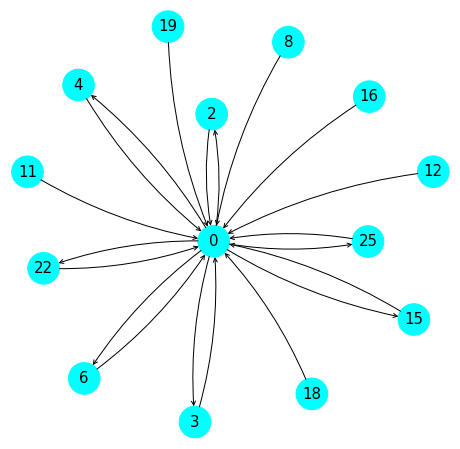

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 385.53it/s]


y: Fake
Removing edges with score less than 0.13400447368621826 with min 0.11333436518907547 and max 0.15930157899856567
Dropping 406 edges out of 811


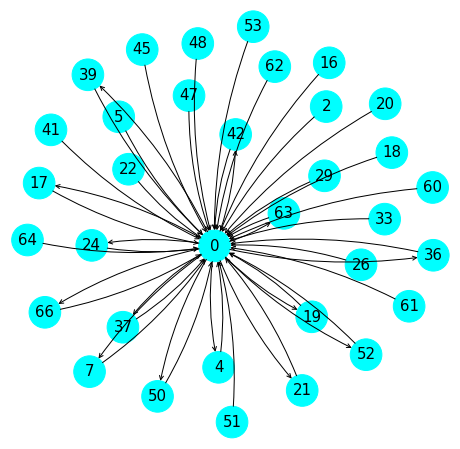

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 362.02it/s]


y: Fake
Removing edges with score less than 0.12528672814369202 with min 0.10387980937957764 and max 0.15239065885543823
Dropping 241 edges out of 481


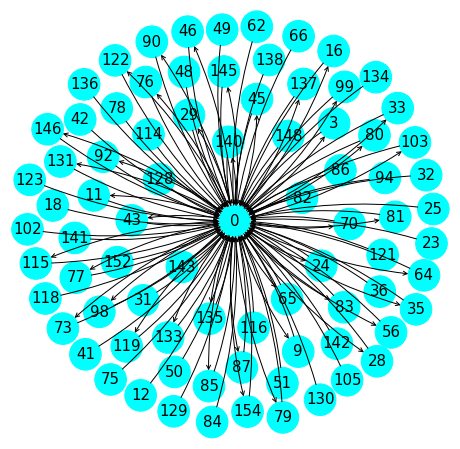

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 400.05it/s]


y: Fake
Removing edges with score less than 0.08565499633550644 with min 0.06838936358690262 and max 0.9462389349937439
Dropping 31 edges out of 61


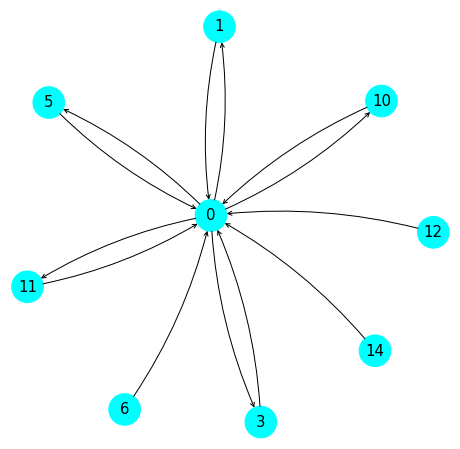

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 384.34it/s]

y: Fake
Removing edges with score less than 0.09045541286468506 with min 0.07070545852184296 and max 0.9470661282539368
Dropping 40 edges out of 79


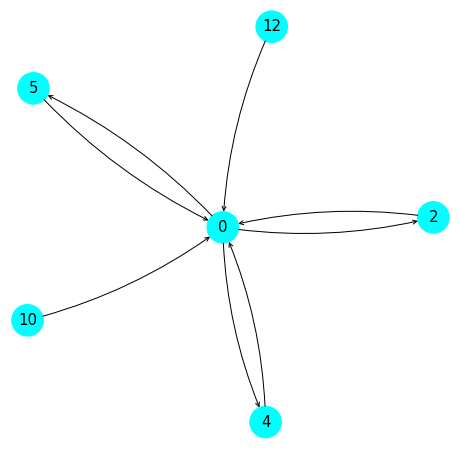

In [11]:
sample_data_list = dataset_manager.get_random_train_samples(device=model.m_args.device, label=0, len_samples=10)
explainers = []
user_ids = []
for sample in sample_data_list:
    e = GNNModelExplainer(model, sample)
    e.visualize_explaining_graph()
    user_ids.append(e.get_node_ids_of_explaining_subgraph())
    explainers.append(e)

In [12]:
import numpy as np
arr = user_ids[0]
for i in range(1, len(user_ids)):
    arr = np.intersect1d(arr, user_ids[i])
print(arr)

[0]
